<a href="https://colab.research.google.com/github/mauriciomontanares1601/ML.-SilicaPredict/blob/master/FrothFlotationRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Read data and process that 

In [ ]:
#read data from GDrive 

data_mining = pd.read_csv('resampling_data.csv')


In [ ]:
data_mining=data_mining.dropna()

In [ ]:
from sklearn import preprocessing
X = data_mining.drop(['% Silica Concentrate', '% Iron Concentrate', 'Unnamed: 0'], axis=1) #drop target row
y = data_mining['% Silica Concentrate']  #select target row

#X = preprocessing.normalize(X)



#Split data and create the model

In [ ]:
#import split 
from sklearn.model_selection import train_test_split
#make split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#charge randomforestregressor model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) 



#Fit model and test

In [ ]:
#fit model
model.fit(X_train, y_train)

estimator = model.estimators_[2]


In [ ]:
model.score(X_test,y_test)

0.3815290033010753

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
             
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.pdf', '-Gdpi=4'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.pdf')

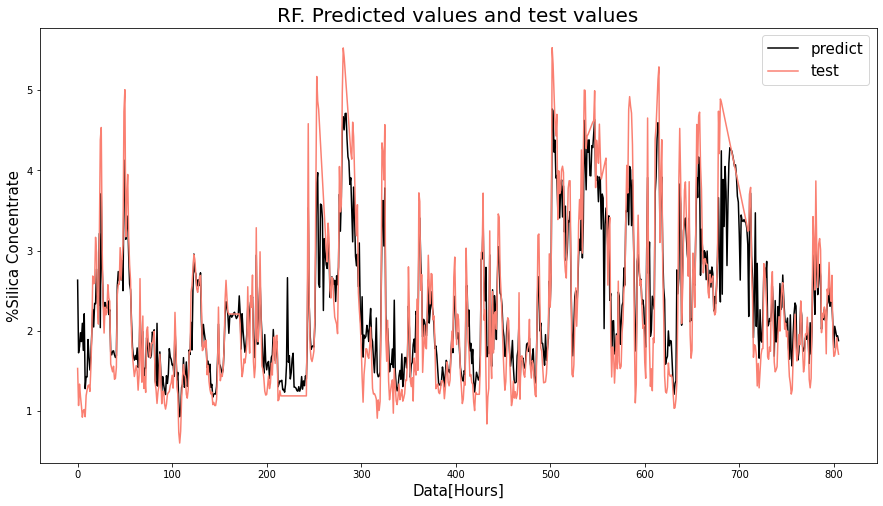

In [ ]:
var = 3402
win = 1000

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
y_y = y[var:(var+win)]
pred = model.predict(X[var:(var+win)])
plt.plot(pred, label = 'predict', color = 'black')
plt.plot(range(y_y.shape[0]),y_y, label = 'test', color = 'salmon')


plt.title('RF. Predicted values and test values', fontsize=20)
plt.xlabel('Data[Hours]', fontsize = 15)
plt.ylabel('%Silica Concentrate', fontsize = 15)
plt.legend(fontsize=15)
plt.savefig("RDF_test.pdf")
plt.show()

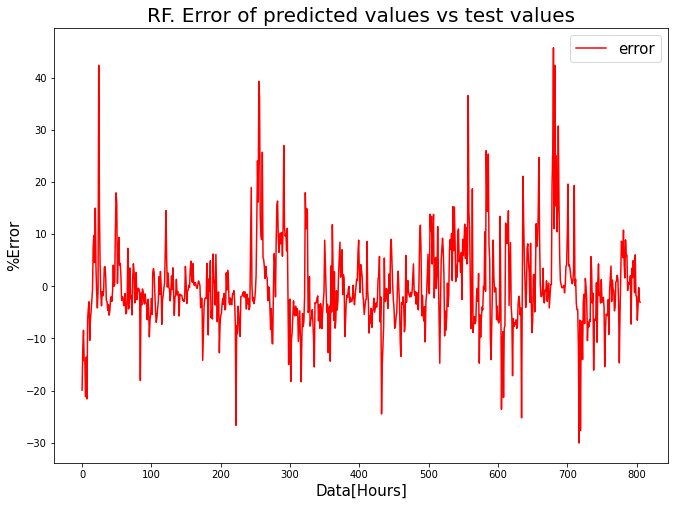

In [ ]:
#Plot error 
var = 3402
win = 1000

import matplotlib.pyplot as plt
plt.figure(figsize=(11, 8))
y_y = y[var:(var+win)]
pred = model.predict(X[var:(var+win)])
error = (y_y-pred) 

error_percent = error*100/y_y.max()

plt.plot(range(error.shape[0]),error_percent, label = 'error', color = 'red')

plt.title('RF. Error of predicted values vs test values', fontsize=20)
plt.xlabel('Data[Hours]', fontsize = 15)
plt.ylabel('%Error', fontsize = 15)
plt.legend(fontsize=15)
plt.savefig("RDF_error.pdf")
plt.show()


In [ ]:
error_percent.mean()

0.02155530682286105

In [ ]:
from sklearn import metrics
 
# Predict
pred = model.predict(X_test)
 
# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

#0.62

Final score (MSE): 0.7032288140807469


In [ ]:
 
import numpy as np
 
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.8385873920354079


## Save the model

In [ ]:
#import pickle
#pickle.dump(model, open("FrothFlotation.pkl","wb"))



In [ ]:
#load a model
#loaded_model = pickle.load(open("/content/drive/My Drive/Colab Notebooks/CpcProyect/data/FrothFlotation.pkl","rb"))
#loaded_model.score(X_test,y_test)

# TEST WITHOUT MEAN

In [ ]:
#read data from GDrive 
data_mining_notmean = pd.read_csv('resampling_data_without_mean.csv')


In [ ]:
data_mining_notmean=data_mining_notmean.dropna()

In [ ]:
X = data_mining_notmean.drop(['% Silica Concentrate', '% Iron Concentrate', 'Unnamed: 0'], axis=1) #drop target row
y = data_mining_notmean['% Silica Concentrate']  #select target row

#Split data and create the model

In [ ]:
#import split 
from sklearn.model_selection import train_test_split
#make split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#charge randomforestregressor model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200) 


#Fit model and test

In [ ]:
#fit model
model.fit(X_train, y_train)
#model.score(X_test,y_test)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.score(X_test,y_test)

0.30307836228583873

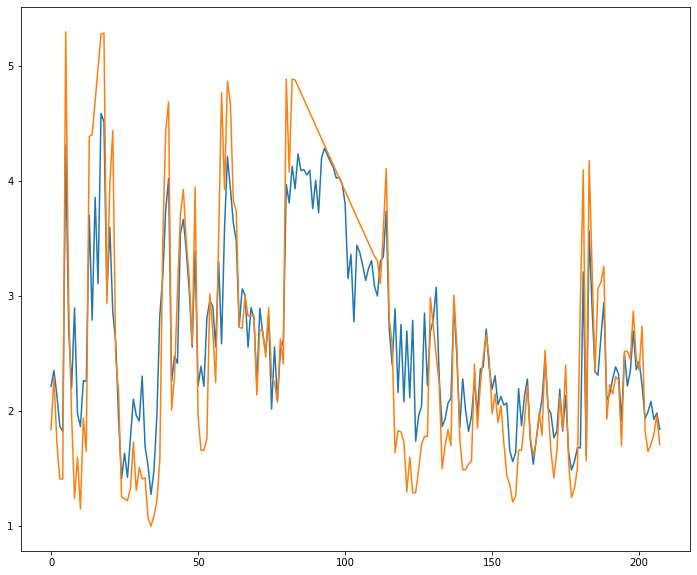

In [ ]:
var = 4000
win = 500

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
y_y = y[var:(var+win)]
pred = model.predict(X[var:(var+win)])
plt.plot(pred)
plt.plot(range(y_y.shape[0]),y_y)

plt.show()

In [ ]:
from sklearn import metrics
 
# Predict
pred = model.predict(X_test)
 
# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.87983766974188


In [ ]:
 
import numpy as np
 
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.9379966256559136


In [ ]:
#import pickle
#pickle.dump(model, open("FrothFlotation.pkl","wb"))



In [ ]:
#load a model
#loaded_model = pickle.load(open("/content/drive/My Drive/Colab Notebooks/CpcProyect/data/FrothFlotation.pkl","rb"))
#loaded_model.score(X_test,y_test)

#CORRELATION MATRIX
Visual representation

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))

#read original data
data_flotation = pd.read_csv("drive/My Drive/Colab Notebooks/CpcProyect/data/flotation.csv")
data_feed = pd.read_csv("drive/My Drive/Colab Notebooks/CpcProyect/data/feed.csv")

#process data
data_flotation = data_flotation.drop(columns=['Unnamed: 0', 'X1', 'date' ], axis=1) #drop some columns
data_feed = data_feed.drop(columns=['Unnamed: 0', 'X1', 'date' ], axis=1) #drop some columns

total_data_frame = pd.concat([data_flotation, data_feed], axis=1) #concat data (horizontal concat)

#create matrix
corr_matrix = total_data_frame.corr()

sn.heatmap(corr_matrix , annot=True)
plt.savefig("corr_matrix.pdf")
plt.show()

In [ ]:
df_corr = pd.DataFrame(corr_matrix)
corr_values = np.array(df_corr.iloc[22]) #drop sclica 
corr_values = corr_values[0:len(corr_values)-1]

corr_names = np.array(df_corr.columns)
corr_names = corr_names[0:len(corr_names)-1] #drop sclica name
#corr_names = np.array(corr_names.columns)


plt.figure(figsize=(17, 8))
plt.barh(corr_names, corr_values, color="salmon", edgecolor="black")
plt.title("% Silica Concentrate Correlation")
plt.xticks(fontsize=11,rotation=90)
plt.savefig("corr_silicia.pdf")
plt.show()



# DATA INFO

Data Landscape

    (C - Controllable variable, NC - Not controllable)
    (Refer to the data structure image in the attached zip folder)

    (in feed.csv) : Contains information of input feed at 20s frequency. Two outputs also exist, iron concentrate and Silica concentrate.

    Variables:

    Date time
    Constituents of the raw material (NC) [% silica feed, % iron feed]
    Ore pulp flow (C)
    Amina flow and starch flow(C)
    Ore pulp pH (C)
    Ore pulp Density (C)
    %Silica concentrate (Target Variable)
    %Iron concentrate (NC)




In [ ]:
plt.plot(total_data_frame['% Iron Feed'])

In [ ]:
plt.plot(total_data_frame['% Silica Feed'])

In [ ]:
total_data_frame.columns


#
   

```
# This is formatted as code
```plt.figure(figsize=(17, 8))
  plt.barh(corr_names, corr_values, color="salmon", edgecolor="black")
  plt.title("% Silica Concentrate Correlation")
  plt.xticks(fontsize=11,rotation=90)
plt.savefig("corr_silicia.pdf")
plt.show()



In [ ]:
plt.plot(total_data_frame['Flotation Column 01 Air Flow'])

In [ ]:


       
plt.plot(total_data_frame['% Iron Concentrate'])


In [ ]:

plt.plot(total_data_frame['% Silica Concentrate'])